In [1]:
import pandas as pandas
fpath= r'C:\work_folder\Misc_codes\Prelim_gage_data_parsing\Onda_gage_data_FINAL\Onda_gage_data_files\S01OP1SR21_Brush.rfb'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def read_sensor_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Find the line where data starts
    data_start_index = 0
    for i, line in enumerate(lines):
        if "[Raw Data]" in line:
            data_start_index = i + 1
            break
    
    # Read the data lines into a DataFrame
    data_lines = lines[data_start_index:]
    data = []
    for line in data_lines:
        parts = line.strip().split()
        if len(parts) == 7:
            try:
                line_number = int(parts[0])
                time = parts[1]
                tempC = float(parts[2])
                volt = float(parts[3])
                wt = float(parts[4])
                pow = float(parts[5])
                state = int(parts[6])
                data.append([line_number, time, tempC, volt, wt, pow, state])
            except ValueError:
                continue  # Skip lines that can't be parsed
    
    df = pd.DataFrame(data, columns=['Line Number', 'Time', 'Temperature', 'Voltage', 'Weight', 'Power', 'State'])
    df["time"]= df["time"]-min(df["time"])
    return df

def plot_sensor_data(folder_path, serial_number):
    files = [f for f in os.listdir(folder_path) if serial_number in f and f.endswith('.rfb')]
    
    if not files:
        print(f"No files found with serial number '{serial_number}' in folder '{folder_path}'.")
        return

    plt.figure(figsize=(15, 10))

    for file in files:
        file_path = os.path.join(folder_path, file)
        df = read_sensor_data(file_path)

        # Convert time to datetime format for plotting
        try:
            df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S.%f')
            df['Time']= ['Time']-min()
            df['Time']= df['Time']-min(df['Time'])
        except Exception as e:
            print(f"Time parsing error in file {file}: {e}")
            continue

        plt.subplot(3, 1, 1)
        plt.plot(df['Time'], df['Voltage'], label=file)
        plt.xlabel('Time')
        plt.ylabel('Voltage')
        plt.legend()

        plt.subplot(3, 1, 2)
        plt.plot(df['Time'], df['Weight'], label=file)
        plt.xlabel('Time')
        plt.ylabel('Weight')
        plt.legend()

        plt.subplot(3, 1, 3)
        plt.plot(df['Time'], df['Power'], label=file)
        plt.xlabel('Time')
        plt.ylabel('Power')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_sensor_data('path_to_your_folder', 'serial_number')


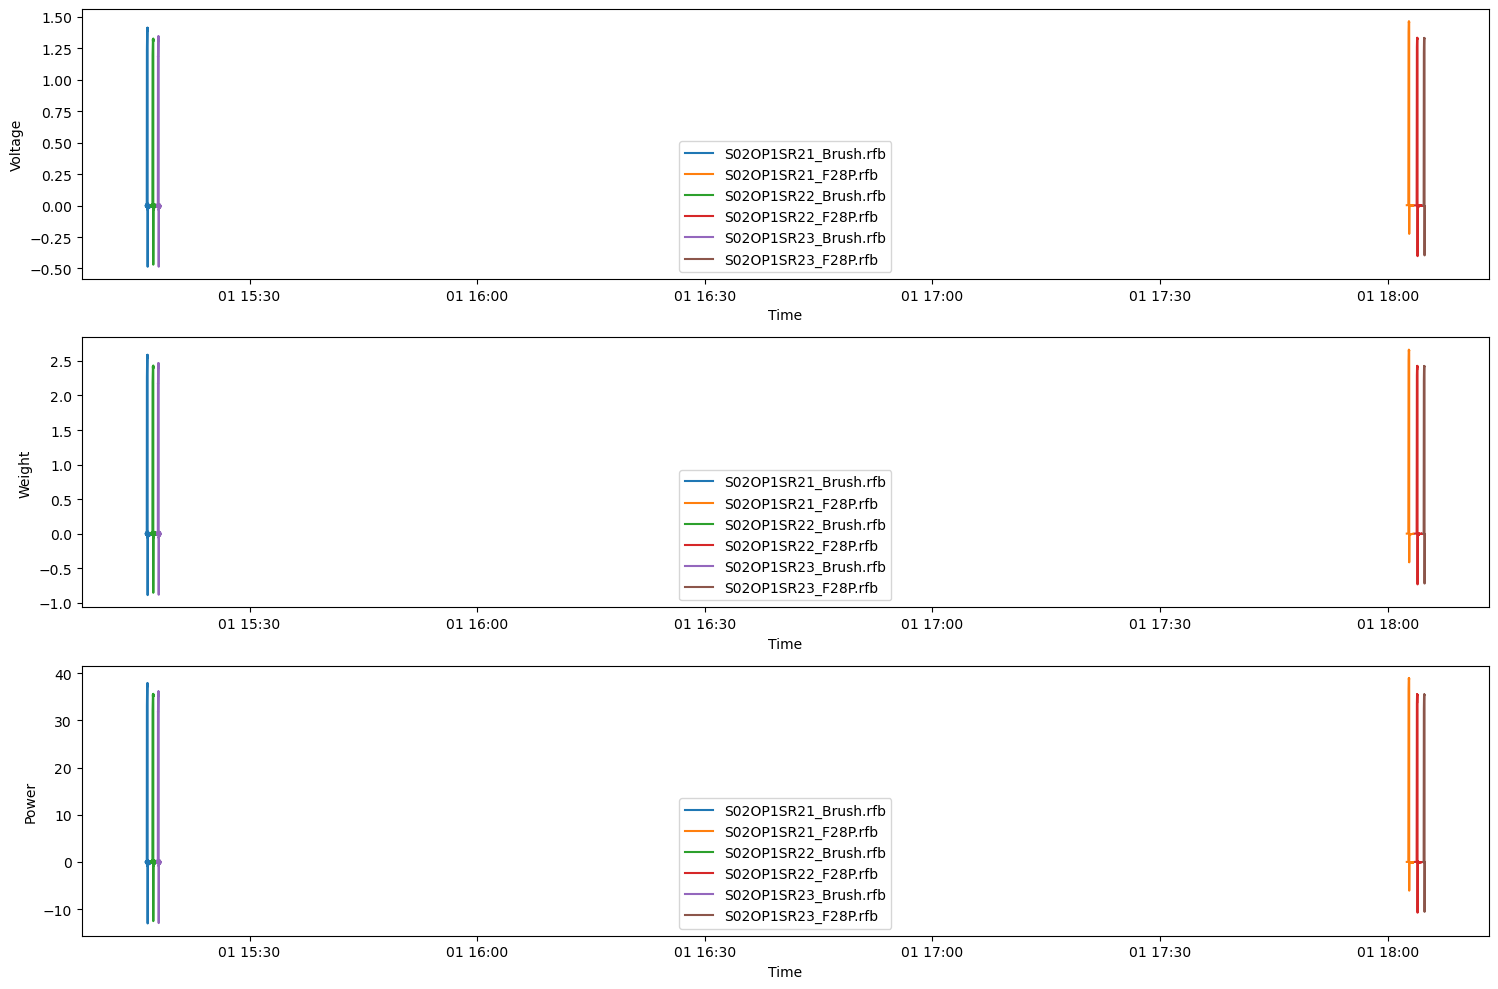

In [3]:
data_path= r'C:\work_folder\Misc_codes\Prelim_gage_data_parsing\Onda_gage_data_FINAL\Onda_gage_data_files'
plot_sensor_data(data_path, 'S02OP1SR2')

In [ ]:
data_path= r'C:\work_folder\Misc_codes\Prelim_gage_data_parsing\Onda_gage_data_FINAL\Onda_gage_data_files'



In [10]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plotly_plot2(folder_path, serial_numbers):
    files = [f for f in os.listdir(folder_path) if any(serial_number in f for serial_number in serial_numbers) and 'Brush' in f and f.endswith('.rfb')]
    print(files)
    if not files:
        print(f"No files found with serial number '{serial_number}' in folder '{folder_path}'.")
        return

    fig = make_subplots(rows=3, cols=1, shared_xaxes=True, 
                        subplot_titles=('Volt vs Time', 'Wt vs Time', 'Power vs Time'))

    for file in files:
        file_path = os.path.join(folder_path, file)
        df = read_sensor_data(file_path)

        # Convert time to datetime format for plotting
        try:
            df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S.%f')
            df['Time']= df['Time']-min(df['Time'])
        except Exception as e:
            print(f"Time parsing error in file {file}: {e}")
            continue

        t_x= df['Time']

        fig.add_trace(go.Scatter(x=df['Time'], y=df['Voltage'], mode='lines', name=f'{file} - Voltage'), row=1, col=1)
        fig.add_trace(go.Scatter(x=df['Time'], y=df['Weight'], mode='lines', name=f'{file} - Weight'), row=2, col=1)
        fig.add_trace(go.Scatter(x=df['Time'], y=df['Power'], mode='lines', name=f'{file} - Power'), row=3, col=1)

    fig.update_layout(
        title='Sensor Data',
        height=900,
        showlegend=True
    )

    fig.update_xaxes(title_text='Time', row=3, col=1)
    fig.update_yaxes(title_text='Voltage', row=1, col=1)
    fig.update_yaxes(title_text='weight', row=2, col=1)
    fig.update_yaxes(title_text='Power', row=3, col=1)

    fig.show()

# Example usage:
# plot_sensor_data('path_to_your_folder', 'serial_number')


In [11]:
SNs= ['S01OP1SR1', 'S01OP2SR1', 'S01OP3SR1', 'S01OP1SR2']
plotly_plot2(data_path, SNs)

['S01OP1SR21_Brush.rfb', 'S01OP1SR22_Brush.rfb', 'S01OP1SR23_Brush.rfb', 'S01OP2SR11_Brush.rfb', 'S01OP2SR12_Brush.rfb', 'S01OP2SR13_Brush.rfb']
